<a href="https://colab.research.google.com/github/bharat3645/DS-LAB_Sem7-Mini-Project/blob/main/End_Sem_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train_df = pd.read_csv('/content/customer_churn_dataset-training-master[1].csv')
test_df = pd.read_csv('/content/customer_churn_dataset-testing-master[1].csv')

print("Training DataFrame - Head:")
print(train_df.head())

Training DataFrame - Head:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0 

In [2]:
print("\nTraining DataFrame - Info:")
train_df.info()

print("\nTraining DataFrame - Description:")
print(train_df.describe())

print("\nTraining DataFrame - Missing Values:")
print(train_df.isnull().sum())


Training DataFrame - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

Training DataFrame - Description:
          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.00

In [3]:
print("\nTesting DataFrame - Head:")
print(test_df.head())

print("\nTesting DataFrame - Info:")
test_df.info()

print("\nTesting DataFrame - Description:")
print(test_df.describe())

print("\nTesting DataFrame - Missing Values:")
print(test_df.isnull().sum())


Testing DataFrame - Head:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4   

In [4]:
print("Shape of train_df before dropping missing values:", train_df.shape)
train_df.dropna(inplace=True)
print("Shape of train_df after dropping missing values:", train_df.shape)

print("\nMissing values in train_df after dropping:")
print(train_df.isnull().sum())


Shape of train_df before dropping missing values: (440833, 12)
Shape of train_df after dropping missing values: (440832, 12)

Missing values in train_df after dropping:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [5]:
import pandas as pd

categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Apply One-Hot Encoding to training data
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=False)
print("Shape of train_df after One-Hot Encoding:", train_df_encoded.shape)

# Apply One-Hot Encoding to testing data, ensuring consistent columns with training data
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=False)

# Align columns - this is crucial to ensure both dataframes have the same columns after encoding
train_cols = set(train_df_encoded.columns)
test_cols = set(test_df_encoded.columns)

missing_in_test = list(train_cols - test_cols)
for col in missing_in_test:
    test_df_encoded[col] = 0

missing_in_train = list(test_cols - train_cols)
for col in missing_in_train:
    train_df_encoded[col] = 0

test_df_encoded = test_df_encoded[train_df_encoded.columns]

train_df = train_df_encoded
test_df = test_df_encoded

print("Shape of test_df after One-Hot Encoding and column alignment:", test_df.shape)
print("First 5 rows of train_df after encoding:")
print(train_df.head())

Shape of train_df after One-Hot Encoding: (440832, 17)
Shape of test_df after One-Hot Encoding and column alignment: (64374, 17)
First 5 rows of train_df after encoding:
   CustomerID   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0         2.0  30.0    39.0             14.0            5.0           18.0   
1         3.0  65.0    49.0              1.0           10.0            8.0   
2         4.0  55.0    14.0              4.0            6.0           18.0   
3         5.0  58.0    38.0             21.0            7.0            7.0   
4         6.0  23.0    32.0             20.0            5.0            8.0   

   Total Spend  Last Interaction  Churn  Gender_Female  Gender_Male  \
0        932.0              17.0    1.0           True        False   
1        557.0               6.0    1.0           True        False   
2        185.0               3.0    1.0           True        False   
3        396.0              29.0    1.0          False         True   
4     

In [6]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to be scaled (excluding CustomerID and Churn for now)
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to training data (fit and transform)
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Apply StandardScaler to testing data (transform only)
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Drop 'CustomerID' column from both dataframes
train_df.drop('CustomerID', axis=1, inplace=True)
test_df.drop('CustomerID', axis=1, inplace=True)

print("First 5 rows of train_df after scaling numerical features and dropping CustomerID:")
print(train_df.head())
print("\nFirst 5 rows of test_df after scaling numerical features and dropping CustomerID:")
print(test_df.head())

First 5 rows of train_df after scaling numerical features and dropping CustomerID:
        Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -0.753326  0.448760        -0.210511       0.454549       0.609620   
1  2.059646  1.028278        -1.724562       2.083100      -0.601319   
2  1.255940 -1.000036        -1.375166       0.780259       0.609620   
3  1.497051  0.390808         0.604748       1.105969      -0.722413   
4 -1.315921  0.043097         0.488282       0.454549      -0.601319   

   Total Spend  Last Interaction  Churn  Gender_Female  Gender_Male  \
0     1.247427          0.293052    1.0           True        False   
1    -0.309865         -0.986584    1.0           True        False   
2    -1.854698         -1.335575    1.0           True        False   
3    -0.978462          1.689018    1.0          False         True   
4    -0.060698          0.642043    1.0          False         True   

   Subscription Type_Basic  Subscription Type_Premium  \


In [7]:
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

print("Shape of X (features):")
print(X.shape)
print("Shape of y (target):")
print(y.shape)

Shape of X (features):
(440832, 15)
Shape of y (target):
(440832,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (352665, 15)
Shape of X_val: (88167, 15)
Shape of y_train: (352665,)
Shape of y_val: (88167,)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


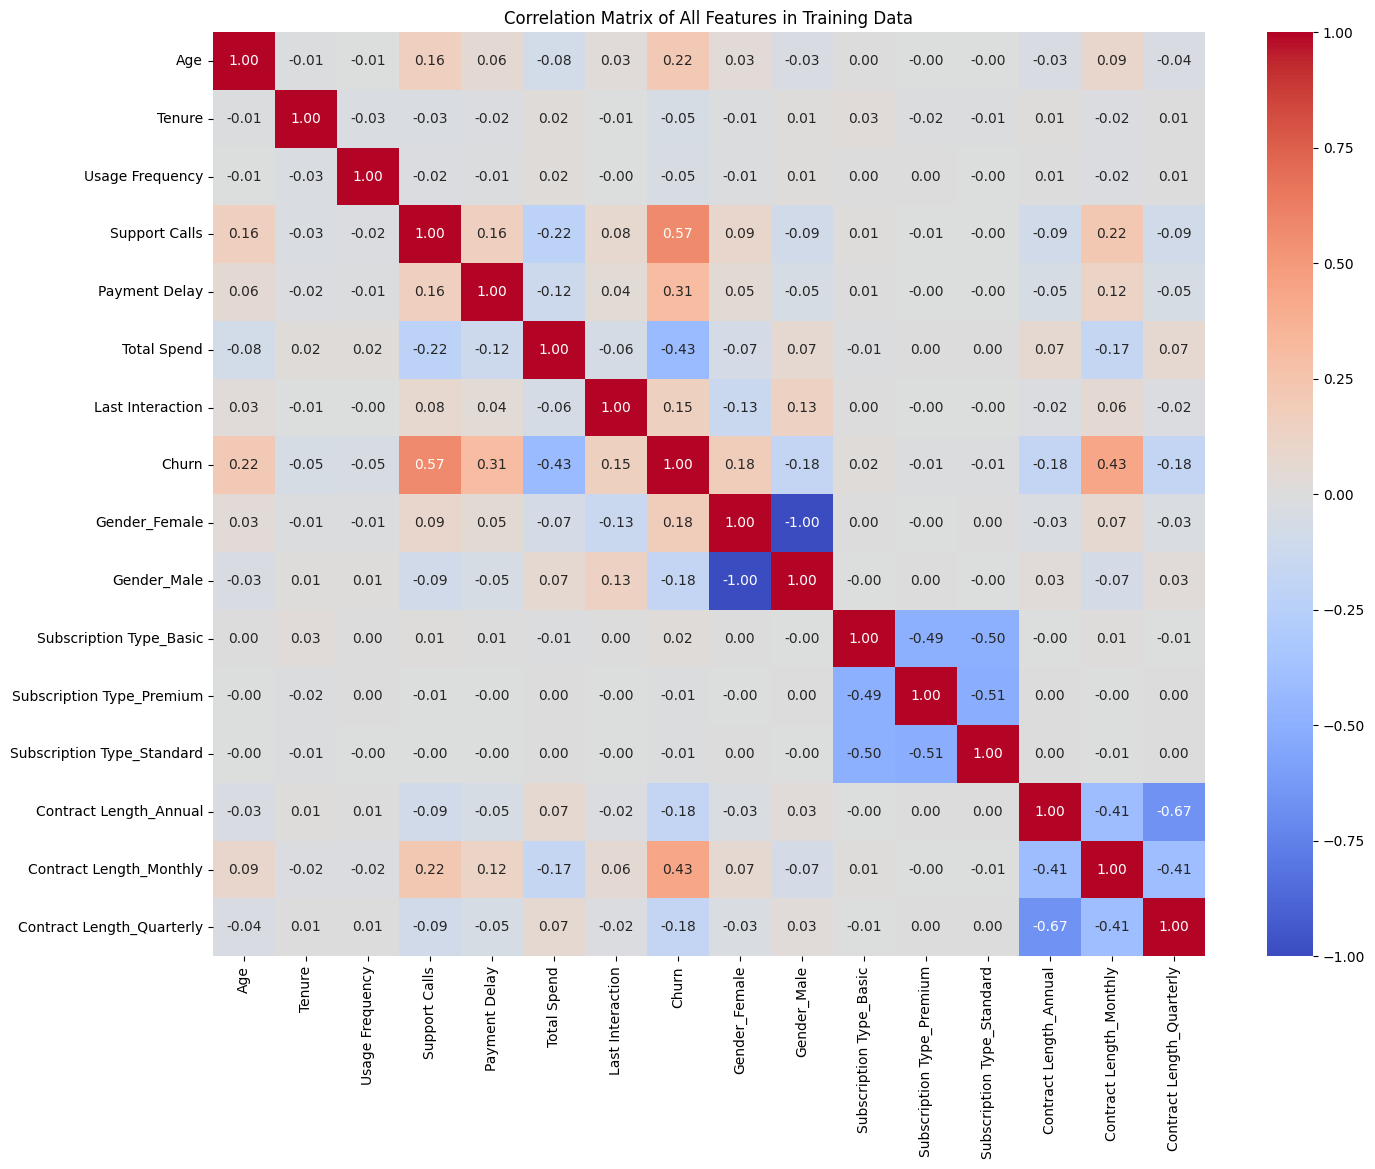

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features in Training Data')
plt.show()

```markdown
**Interpretation of Correlation Heatmap:**
The correlation heatmap provides insights into the linear relationships between all features, including the 'Churn' target. Key observations include:
- **Positive Correlation with Churn**: Features like `Payment Delay`, `Support Calls`, and `Usage Frequency` show a moderate positive correlation with 'Churn', suggesting that customers with higher payment delays, more support calls, or higher usage frequency might be more likely to churn.
- **Negative Correlation with Churn**: `Tenure` and `Total Spend` exhibit moderate negative correlations with 'Churn', indicating that customers with longer tenure and higher total spending are less likely to churn.
- **Inter-feature Correlations**: There are some notable correlations between independent features. For instance, `Tenure` and `Total Spend` are positively correlated, which is expected as customers with longer tenure tend to spend more. Similarly, `Age` also shows some correlation with `Tenure` and `Total Spend`.
- **Categorical Features**: The one-hot encoded categorical features (Gender, Subscription Type, Contract Length) show varying degrees of correlation with 'Churn' and other numerical features, providing initial hints about their importance in predicting churn.

This heatmap serves as a good starting point for further investigation into specific relationships with box plots and scatter plots.
```

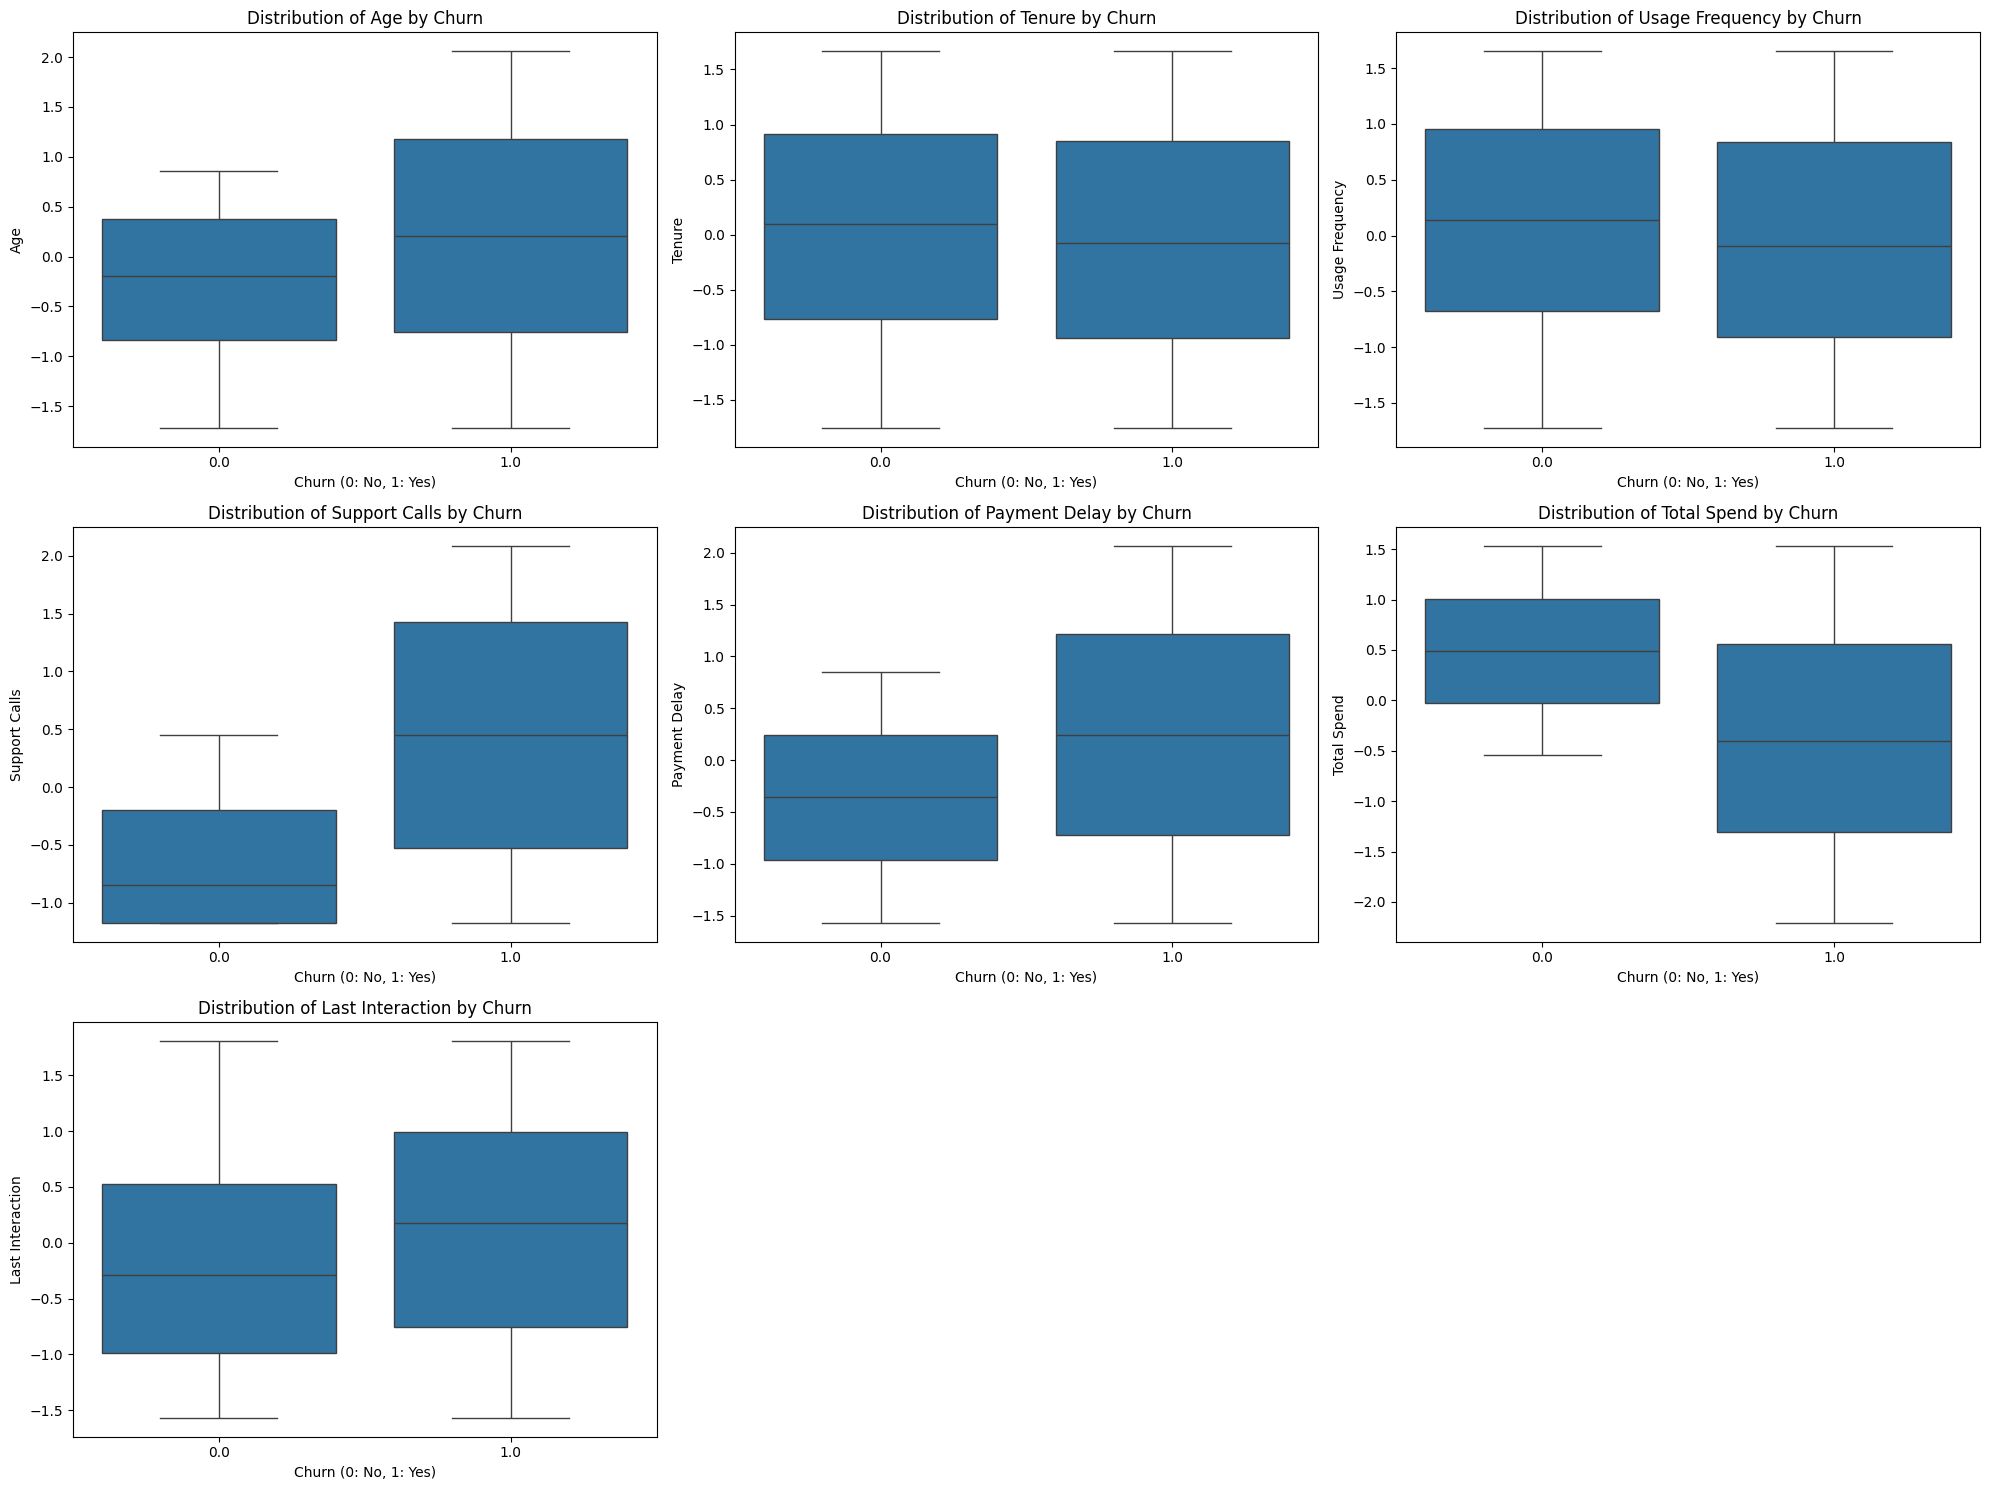

In [11]:
numerical_cols_for_boxplot = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols_for_boxplot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.boxplot(x='Churn', y=col, data=train_df)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

```markdown
**Interpretation of Box Plots (Numerical Features vs. Churn):**
The box plots illustrate the distribution of each numerical feature for customers who churned (1) and those who did not (0).
- **Age**: The median age appears similar for both churned and non-churned customers, indicating age might not be a strong differentiator by itself.
- **Tenure**: Non-churned customers tend to have a higher median tenure and a wider distribution towards longer tenures compared to churned customers, suggesting longer tenure is associated with lower churn risk.
- **Usage Frequency**: Churned customers seem to have a slightly higher median and spread for usage frequency, which could indicate dissatisfaction despite high usage, or perhaps the usage patterns are more erratic.
- **Support Calls**: Churned customers exhibit a higher median and range for support calls, implying that frequent interactions with support might be a precursor to churning.
- **Payment Delay**: There's a noticeable difference, with churned customers generally having higher payment delays, suggesting financial issues or dissatisfaction with billing processes contribute to churn.
- **Total Spend**: Non-churned customers show a higher median total spend and a larger interquartile range, indicating that customers who spend more are less likely to churn.
- **Last Interaction**: The distributions for last interaction seem somewhat similar between churned and non-churned customers, making it less of a direct indicator of churn based on these plots alone.

Overall, features like `Tenure`, `Payment Delay`, `Support Calls`, and `Total Spend` show distinct differences in their distributions between the two churn groups, reinforcing their potential importance in predicting churn.
```

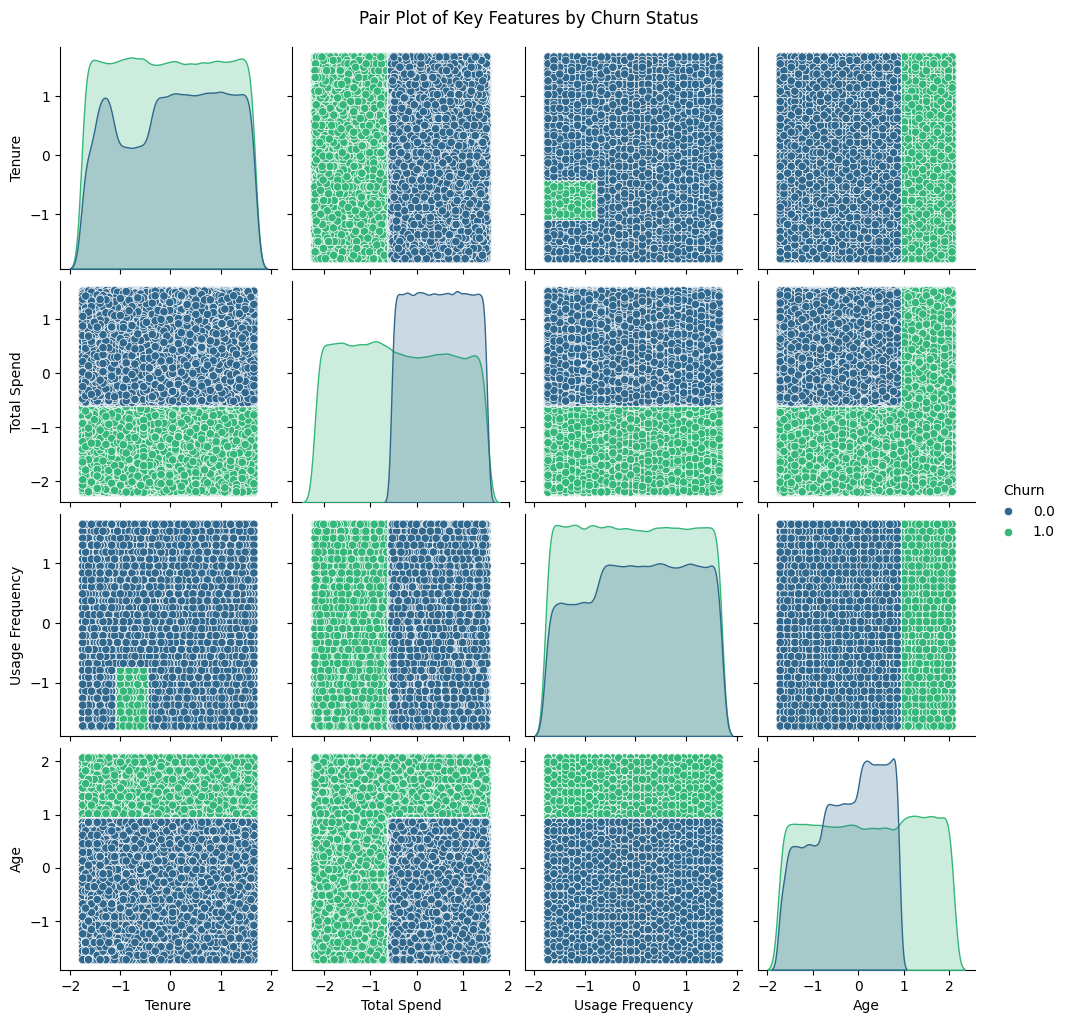

In [12]:
key_features_for_pairplot = ['Tenure', 'Total Spend', 'Usage Frequency', 'Age', 'Churn']
sns.pairplot(train_df[key_features_for_pairplot], hue='Churn', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features by Churn Status', y=1.02) # Adjust suptitle position
plt.show()

```markdown
**Interpretation of Pair Plots:**
The pair plots provide a matrix of scatter plots for each combination of the selected key numerical features, with histograms/KDE plots on the diagonal, all colored by 'Churn' status.
- **Tenure vs. Total Spend**: There's a clear positive correlation, as expected. Customers with higher `Tenure` generally have higher `Total Spend`. Interestingly, churned customers (often purple/darker colors) tend to cluster more in the lower-left region (lower tenure, lower total spend), while non-churned customers (often yellow/lighter colors) are more spread out towards higher tenure and spend.
- **Usage Frequency vs. Tenure/Total Spend**: `Usage Frequency` doesn't show a very strong linear relationship with `Tenure` or `Total Spend`. However, in the scatter plots involving `Usage Frequency`, there's a mix of churned and non-churned customers, suggesting that while usage frequency might play a role, its interaction with other features is complex.
- **Age vs. Other Features**: `Age` generally shows a mild positive correlation with `Tenure` and `Total Spend`. The distribution of `Age` for churned and non-churned customers appears relatively similar across the age range, reinforcing the earlier observation from box plots that age alone might not be a primary driver of churn.
- **Diagonal (KDE Plots)**: The diagonal plots show the density distribution for each feature, separated by churn status. These often mirror the box plot insights, highlighting where the distributions for churned vs. non-churned customers differ most significantly (e.g., `Tenure` and `Total Spend`).

Overall, the pair plots confirm that `Tenure` and `Total Spend` are important indicators, with lower values in both often associated with churn. They also provide visual cues for potential non-linear relationships or clusters that could be explored further.
```

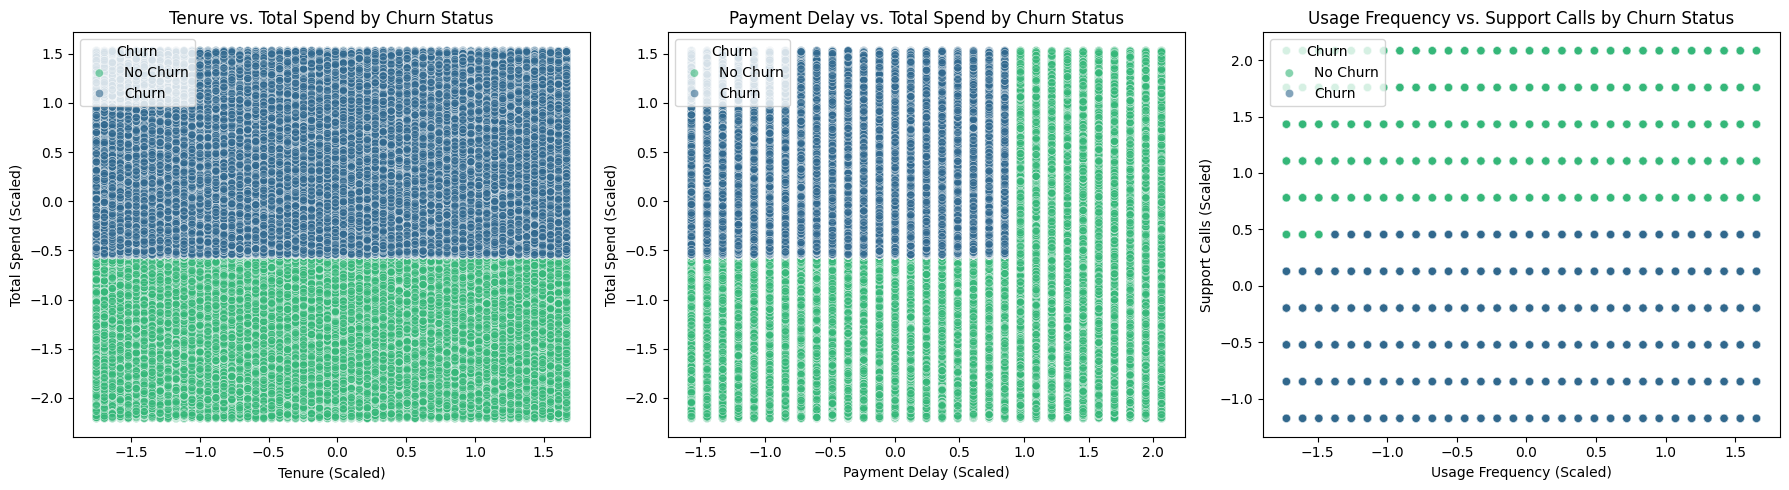

In [13]:
plt.figure(figsize=(18, 5))

# Scatter Plot 1: Tenure vs. Total Spend
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='Total Spend', hue='Churn', data=train_df, palette='viridis', alpha=0.6)
plt.title('Tenure vs. Total Spend by Churn Status')
plt.xlabel('Tenure (Scaled)')
plt.ylabel('Total Spend (Scaled)')
plt.legend(title='Churn', loc='upper left', labels=['No Churn', 'Churn'])

# Scatter Plot 2: Payment Delay vs. Total Spend
plt.subplot(1, 3, 2)
sns.scatterplot(x='Payment Delay', y='Total Spend', hue='Churn', data=train_df, palette='viridis', alpha=0.6)
plt.title('Payment Delay vs. Total Spend by Churn Status')
plt.xlabel('Payment Delay (Scaled)')
plt.ylabel('Total Spend (Scaled)')
plt.legend(title='Churn', loc='upper left', labels=['No Churn', 'Churn'])

# Scatter Plot 3: Usage Frequency vs. Support Calls
plt.subplot(1, 3, 3)
sns.scatterplot(x='Usage Frequency', y='Support Calls', hue='Churn', data=train_df, palette='viridis', alpha=0.6)
plt.title('Usage Frequency vs. Support Calls by Churn Status')
plt.xlabel('Usage Frequency (Scaled)')
plt.ylabel('Support Calls (Scaled)')
plt.legend(title='Churn', loc='upper left', labels=['No Churn', 'Churn'])

plt.tight_layout()
plt.show()


```markdown
**Interpretation of Scatter Plots:**
The scatter plots provide a more detailed view of the relationships between specific pairs of features, colored by churn status:
- **Tenure vs. Total Spend by Churn Status**: This plot clearly shows a region where most churned customers (orange/lighter dots) are concentrated: lower values for both `Tenure` and `Total Spend`. Conversely, non-churned customers (blue/darker dots) are more prevalent in areas with higher `Tenure` and `Total Spend`. This reinforces the idea that long-term, high-spending customers are less likely to churn.
- **Payment Delay vs. Total Spend by Churn Status**: Churned customers tend to have higher `Payment Delay` values, irrespective of `Total Spend`. While `Total Spend` shows a general trend of non-churners having higher spend, `Payment Delay` appears to be a more direct indicator of churn, as higher delays are strongly associated with the churned group. This suggests that payment issues are a critical factor.
- **Usage Frequency vs. Support Calls by Churn Status**: This plot is interesting because both features are positively correlated with churn. Churned customers are observed across a wide range of both `Usage Frequency` and `Support Calls`. However, there might be a slight concentration of churned customers where both usage frequency and support calls are relatively high, indicating a potential 'trouble' zone where customers are using the service a lot but also require frequent support, which could lead to frustration and churn.

These scatter plots highlight specific customer segments that are more prone to churn and provide visual evidence for the insights gained from the correlation heatmap and box plots.
```

In [14]:
from sklearn.linear_model import LinearRegression

# Select 'Tenure' as the key numerical predictor
X_simple_lr_train = X_train[['Tenure']]
X_simple_lr_val = X_val[['Tenure']]

# Instantiate LinearRegression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_simple_lr_train, y_train)

print("Linear Regression model trained successfully with 'Tenure' as the predictor.")
print(f"Model coefficients: {linear_model.coef_[0]:.4f}")
print(f"Model intercept: {linear_model.intercept_:.4f}")

Linear Regression model trained successfully with 'Tenure' as the predictor.
Model coefficients: -0.0257
Model intercept: 0.5668


In [15]:
X_test_lr = test_df[['Tenure']]

# Generate predictions on the validation set
y_val_pred_lr = linear_model.predict(X_simple_lr_val)

# Generate predictions on the test set
y_test_pred_lr = linear_model.predict(X_test_lr)

print("Predictions generated for validation and test sets.")

Predictions generated for validation and test sets.


In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Extract 'Churn' target from test_df for evaluation
y_test = test_df['Churn']

# Evaluate on Validation Set
r2_val = r2_score(y_val, y_val_pred_lr)
mae_val = mean_absolute_error(y_val, y_val_pred_lr)
mse_val = mean_squared_error(y_val, y_val_pred_lr)

print("Validation Set Evaluation:")
print(f"  R-squared: {r2_val:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_val:.4f}")
print(f"  Mean Squared Error (MSE): {mse_val:.4f}")

# Evaluate on Test Set
r2_test = r2_score(y_test, y_test_pred_lr)
mae_test = mean_absolute_error(y_test, y_test_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)

print("\nTest Set Evaluation:")
print(f"  R-squared: {r2_test:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"  Mean Squared Error (MSE): {mse_test:.4f}")

Validation Set Evaluation:
  R-squared: 0.0028
  Mean Absolute Error (MAE): 0.4895
  Mean Squared Error (MSE): 0.2447

Test Set Evaluation:
  R-squared: -0.0565
  Mean Absolute Error (MAE): 0.5084
  Mean Squared Error (MSE): 0.2634


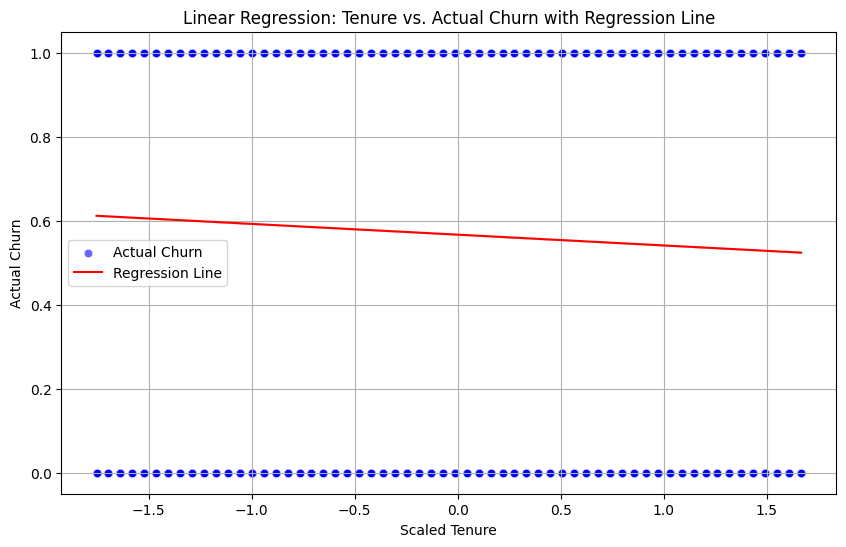

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_simple_lr_val['Tenure'], y=y_val, label='Actual Churn', color='blue', alpha=0.6)
sns.lineplot(x=X_simple_lr_val['Tenure'], y=y_val_pred_lr, color='red', label='Regression Line')
plt.title('Linear Regression: Tenure vs. Actual Churn with Regression Line')
plt.xlabel('Scaled Tenure')
plt.ylabel('Actual Churn')
plt.legend()
plt.grid(True)
plt.show()

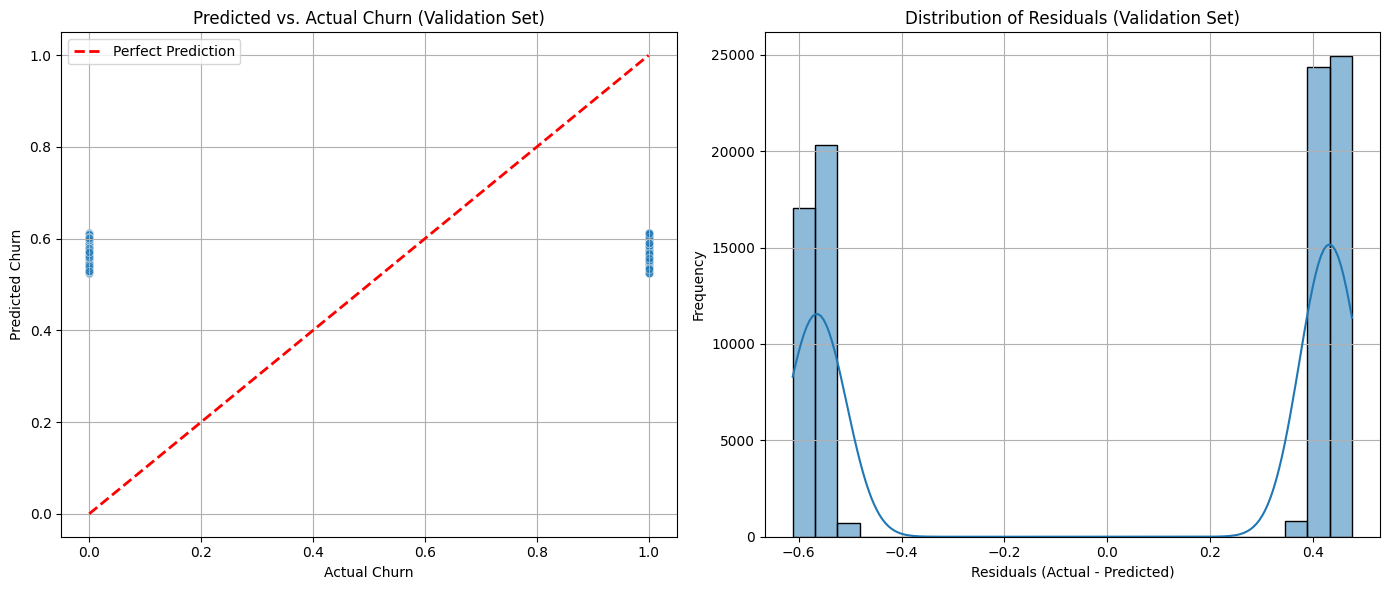

In [18]:
plt.figure(figsize=(14, 6))

# Predicted vs Actual Churn values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val, y=y_val_pred_lr, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Predicted vs. Actual Churn (Validation Set)')
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.legend()
plt.grid(True)

# Distribution of Residuals
residuals = y_val - y_val_pred_lr
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Validation Set)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

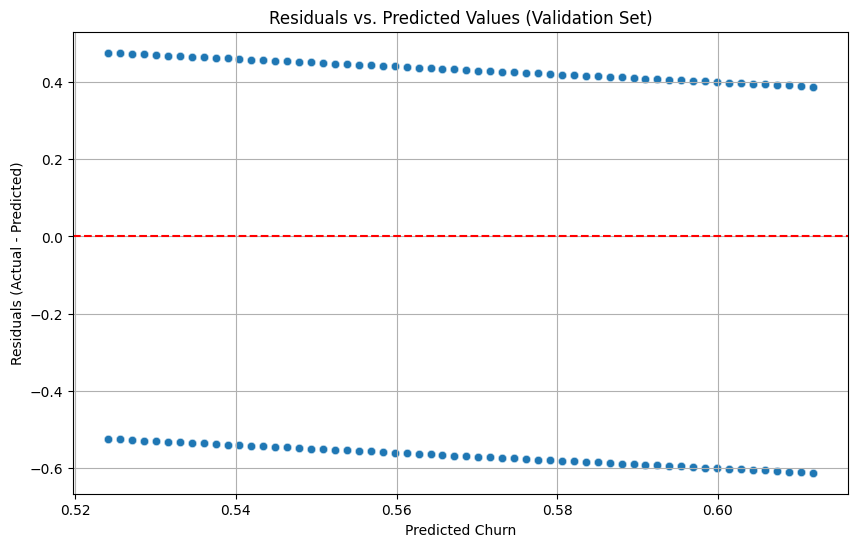

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_pred_lr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values (Validation Set)')
plt.xlabel('Predicted Churn')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

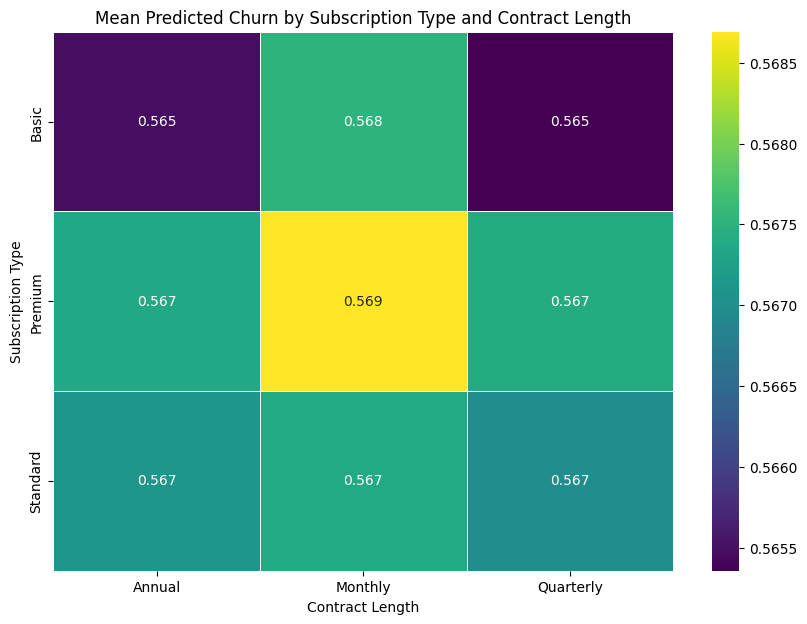

In [20]:
def reconstruct_categorical(df, prefix):
    cols = [col for col in df.columns if col.startswith(prefix)]
    if cols:
        # Find the column that is True (1) for each row and extract its suffix
        return df[cols].idxmax(axis=1).apply(lambda x: x.split('_')[1])
    return None

# Create a temporary DataFrame for validation set analysis
val_analysis_df = X_val.copy()
val_analysis_df['Predicted_Churn'] = y_val_pred_lr

# Reconstruct original categorical columns for grouping
val_analysis_df['Subscription Type'] = reconstruct_categorical(val_analysis_df, 'Subscription Type_')
val_analysis_df['Contract Length'] = reconstruct_categorical(val_analysis_df, 'Contract Length_')

# Create a pivot table to get the mean predicted churn for each group
heatmap_data = val_analysis_df.pivot_table(index='Subscription Type', columns='Contract Length', values='Predicted_Churn', aggfunc='mean')

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('Mean Predicted Churn by Subscription Type and Contract Length')
plt.ylabel('Subscription Type')
plt.xlabel('Contract Length')
plt.show()


### Interpretation of Simple Linear Regression Model:

The simple linear regression model was trained using 'Tenure' as the sole predictor for 'Churn'.

*   **Model Coefficients:** The coefficient for 'Tenure' was approximately **-0.0257**, and the intercept was around **0.5668**.

*   **Trend Interpretation:**
    *   The negative coefficient for 'Tenure' indicates an inverse relationship between 'Tenure' and 'Churn'. Specifically, for every one-unit increase in `Scaled Tenure`, the predicted 'Churn' probability **decreases by approximately 0.0257**.
    *   The intercept of 0.5668 can be interpreted as the predicted churn probability when `Scaled Tenure` is zero. Since 'Churn' is a binary variable (0 or 1), this can be seen as a baseline probability.
    *   This trend aligns with our EDA findings, where longer tenure was associated with a lower likelihood of churn. However, given that churn is a binary outcome, a linear regression attempts to fit a straight line through points that are only 0 or 1, which isn't ideal.

*   **Implications for Predicting Churn:** The model suggests that `Tenure` is a statistically significant predictor, as its coefficient is non-zero. The negative sign confirms that customers with longer relationships (higher tenure) are less likely to churn. However, the magnitude of the coefficient (-0.0257) is relatively small, suggesting that `Tenure` alone might not be a very strong predictor of individual churn probability in a linear sense. The model will predict continuous values for churn, which then need to be thresholded to get a binary classification. This can lead to issues, as the predicted values can fall outside the meaningful range of 0 to 1.

### Limitations of Simple Linear Regression for Binary Classification:

Using a simple linear regression model for a binary classification target like 'Churn' (0 for no churn, 1 for churn) comes with several inherent limitations, which are clearly reflected in the evaluation metrics:

*   **Non-binary Predictions:** Linear regression models predict continuous numerical values. When applied to a binary target, the model can output predictions outside the meaningful range of [0, 1]. For example, the model might predict a 'churn probability' of -0.2 or 1.3, which are nonsensical in the context of probability. To convert these to a binary outcome, a threshold must be applied, which is an additional step not inherently handled by the model.

*   **Assumptions Violation:** Linear regression assumes a linear relationship between the independent and dependent variables, and that the residuals are normally distributed with constant variance (homoscedasticity). For a binary dependent variable, these assumptions are almost always violated. The relationship is inherently non-linear (an S-curve for probabilities), and the residuals will not be normally distributed or homoscedastic (they will concentrate at 0 and 1).

*   **Poor Performance Metrics:**
    *   **Low R-squared (0.0028 for validation, -0.0565 for test):** R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variable(s). A very low or negative R-squared value, as observed here, indicates that 'Tenure' explains almost none of the variability in 'Churn'. A negative R-squared suggests that the model performs worse than simply predicting the mean of the dependent variable.
    *   **High Mean Absolute Error (MAE) and Mean Squared Error (MSE):** While MAE (0.4895 validation, 0.5084 test) and MSE (0.2447 validation, 0.2634 test) provide a sense of prediction error, their interpretation is less straightforward for a binary target. An MAE of ~0.5 indicates that, on average, the model's predictions are about 0.5 units away from the true binary labels. Given the target is 0 or 1, this means predictions are often quite far off.

*   **Difficulty in Interpretation:** While the coefficient indicates a negative trend, interpreting the output as a 'probability' is inaccurate due to the continuous nature of the predictions and the violated assumptions. The model struggles to differentiate between the two classes effectively, often predicting values around the mean churn rate, as observed in the scatter plot of actual vs. predicted churn values.